# **K-평균 군집화와 계층적 군집화 구현하기**

**구글 드라이브 마운트**

먼저, 구글 드라이브에 cluster_data.npz를 업로드하고, 이를 사용하기 위해 구글 드라이브를 마운트한다.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**데이터 로드 및 시각화**

구글 드라이브에 저장된 (300, 2)차원의 숫자 데이터를 로드하고, 산점도를 그려 본다.

(300, 2)


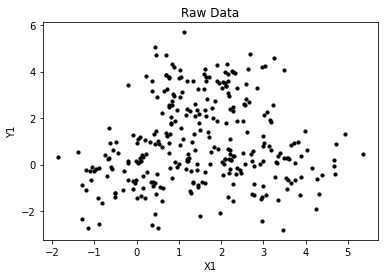

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드하기
npzfile = np.load('/content/gdrive/My Drive/MyColab/Data/cluster_data.npz')
X = npzfile['X']   # 로드한 데이터를 X변수에 할당하고 차원 수 확인
print(X.shape)

# 데이터 산점도 그리기
plt.scatter(X[:,0], X[:,1], c = 'black', s = 10) # c는 색상, s는 marker 사이즈
plt.title('Raw Data')
plt.xlabel('X1'); plt.ylabel('Y1');
plt.show()

**1. K-평균 군집화(K-means clustering) 구현하기**

군집의 개수를 미리 정하여 데이터를 K개의 그룹으로 나누는 K-평균 군집화를 구현해 본다.

모델 생성시 입력 가능한 여러가지 파라미터 중 4개의 파라미터를 설정해 본다.

[[ 1.70627709  3.07298492]
 [ 1.42348695 -0.18310811]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


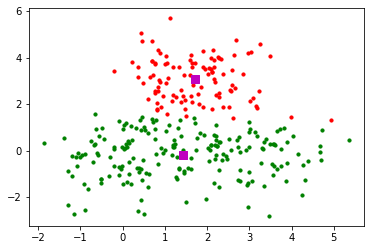

In [5]:
from sklearn.cluster import KMeans
import random

# 파라미터 설정
c_num = 2       # 클러스터 개수. default는 8
m_iter = 200    # 반복 횟수. default는 300
init_alg = "random"  # 초기 중심점 초기화 알고리즘. default는 "k-means++""
init_n = 20     # 최적의 결과를 위한 초기 중앙점 선택 횟수. default는 10

# 군집화 모델 생성
model = KMeans(n_clusters = c_num, init = init_alg, n_init = init_n, max_iter = m_iter).fit(X)

# 군집 중심점 좌표 출력, 변수 할당
print(model.cluster_centers_)
c0, c1 = model.cluster_centers_

# 군집화 결과로 얻은 데이터의 예측 라벨 출력
print(model.labels_)

# K-means 군집화 결과 시각화
colors = ['r', 'g']
for i in range(2):
    plt.scatter( X[model.labels_ == i, 0], X[model.labels_ == i, 1], s = 10, c = colors[i])
plt.scatter(c0[0], c0[1], marker = 's', s = 50, c = 'm')
plt.scatter(c1[0], c1[1], marker = 's', s = 50, c = 'm')



**2. 계층적 군집화(hierarchical clustering) 구현하기**

군집의 개수를 미리 정하지 않고 데이터를 묶는 계층적 군집화를 구현해 본다.

sklearn을 사용하여 계층적 군집화를 할 수도 있지만, 이번에는 scipy 라이브러리를 사용하여

병합적(agglomerative) 군집화를 수행하고, 덴드로그램으로 시각화한다.

계층적 군집화에서의 군집 간의 거리 계산 방식인 최단, 최장, 중심, 평균 연결법, 그리고 Ward's 방법 등을 설정할 수 있다.


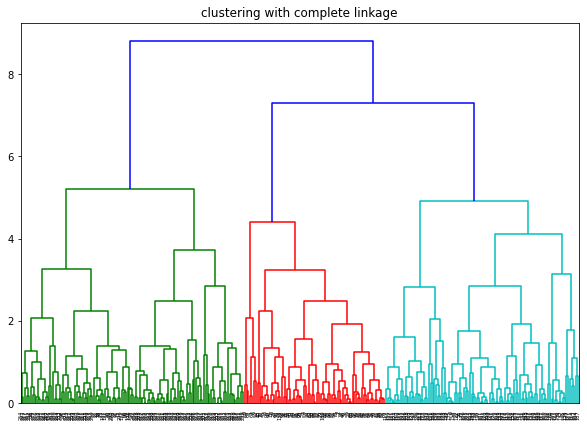

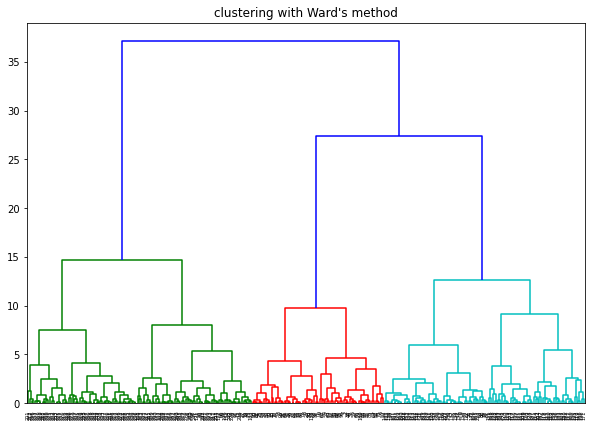

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram

# linkage 함수에 군집화할 데이터와 거리 계산법을 파라미터로 준다
# 최단 = 'single', 최장 = 'complete', 중심 = 'centroid', 평균 = 'average', Ward's = 'ward'
hc1 = linkage(X, method = 'complete')

# 덴드로그램으로 시각화
plt.figure(figsize=(10, 7)) # figsize(가로크기, 세로크기)
plt.title("clustering with complete linkage")
dendrogram(hc1)


# 다른 거리 계산 방식으로 군집화해 본다.
hc2 = linkage(X, method = 'ward')
plt.figure(figsize=(10, 7)) # figsize(가로크기, 세로크기)
plt.title("clustering with Ward's method")
dendrogram(hc2)

# 두 군집화 결과를 모두 시각화한다.
# 덴드로그램에서 x축은 데이터의 index, y축은 클러스터 거리이다.
plt.show()

**3. 간단한 데이터로 계층적 군집화 구현하기**

좀 더 간단한 데이터로 군집화를 수행하고, 덴드로그램을 그려 본다.

덴드로그램에서 x축은 데이터의 index, y축은 클러스터 거리이므로, x축은 0은 Xtoy의 첫 번째 데이터인 2를 나타낸다.

Xtoy의 3번째, 8번째 데이터는 모두 0이므로 덴드로그램에서 그 인덱스 값인 2와 7이 군집화 과정에서 먼저 묶여 있는 것을 볼 수 있다.




[[2], [8], [0], [4], [1], [9], [9], [0]]
Xtoy의 요소 개수 :  8


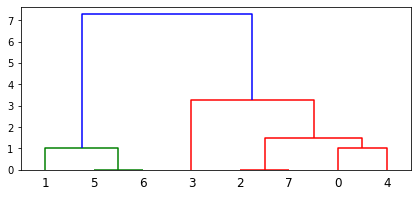

In [8]:
# 간단한 데이터로 군집화해 보기
Xtoy = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
print(Xtoy)
print('Xtoy의 요소 개수 : ', len(Xtoy))

Ztoy = linkage(Xtoy, 'average')
fig = plt.figure(figsize=(7, 3))

# plt.show()를 사용하지 않고 덴드로그램을 변수에 할당해 줘도 시각화 가능
dn = dendrogram(Ztoy)